## Descriptive Analytics and Data Preprocessing on Sales and Discount Dataset

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Descriptive Analytics For Numerical Columns

In [3]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [60]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [8]:
numerical_cols=df.select_dtypes(include=[np.number])
print(numerical_cols)

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  
0   

In [10]:
df.groupby('Brand')['Volume'].agg(['mean','median'])

,mean,median
Brand,,
Babaji,9.933333,7.0
Gear,2.766667,3.0
Jeera,5.200000,4.0
Orange,2.266667,2.0
RealU,6.311111,6.0
Sumsang,2.333333,2.5
Vedic,7.022222,6.0
Viva,4.033333,4.0
YouM,4.866667,5.0


In [12]:
df.groupby('Brand')['Avg Price'].agg(['mean','median'])

,mean,median
Brand,,
Babaji,385.000000,400.0
Gear,639.750000,530.0
Jeera,1558.166667,1600.0
Orange,57600.000000,57600.0
RealU,10100.000000,10100.0
Sumsang,51600.000000,51600.0
Vedic,380.000000,390.0
Viva,1600.000000,1450.0
YouM,14766.666667,16100.0


In [14]:
df.groupby('Brand')['Total Sales Value'].agg(['mean','median'])

,mean,median
Brand,,
Babaji,3913.111111,2325.0
Gear,1790.283333,1500.0
Jeera,5738.544444,5200.0
Orange,130393.333333,120200.0
RealU,68231.111111,60600.0
Sumsang,119066.666667,127750.0
Vedic,2526.666667,2250.0
Viva,6366.666667,5200.0
YouM,74797.777778,80400.0


In [16]:
df.groupby('Brand')['Discount Amount'].agg(['mean','median'])

,mean,median
Brand,,
Babaji,685.005625,459.753921
Gear,311.526527,261.659009
Jeera,1003.814713,907.304539
Orange,9728.228992,8563.289652
RealU,8960.939533,6720.044009
Sumsang,9259.984858,10045.671343
Vedic,445.200067,407.720888
Viva,1102.601084,922.607073
YouM,6821.906878,6423.005429


In [18]:
df.groupby('Brand')['Net Sales Value'].agg(['mean','median'])

,mean,median
Brand,,
Babaji,3228.105486,1871.155404
Gear,1478.756807,1231.904544
Jeera,4734.729732,4339.397129
Orange,120665.104341,111740.440454
RealU,59270.171579,53145.272208
Sumsang,109806.681809,118211.007679
Vedic,2081.466600,1842.279112
Viva,5264.065583,4344.066322
YouM,67975.870900,73522.226737


In [20]:
df['Volume'].mode()


0    3
Name: Volume, dtype: int64

In [22]:
df['Avg Price'].mode()


0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64

In [24]:
df['Total Sales Value'].mode()

0    24300
Name: Total Sales Value, dtype: int64

In [26]:
df['Discount Amount'].mode()

0         69.177942
1         73.025199
2         93.649161
3         94.682735
4        102.705757
           ...     
445    17900.983733
446    21153.498820
447    21496.675367
448    25328.224204
449    25738.022194
Name: Discount Amount, Length: 450, dtype: float64

In [28]:
df['Net Sales Value'].mode()

0         326.974801
1         330.822058
2         466.350839
3         485.317265
4         496.607104
           ...      
445    162603.186379
446    163915.971000
447    163967.080070
448    166263.161348
449    179507.479049
Name: Net Sales Value, Length: 450, dtype: float64

In [30]:
std_dev1=np.std(df['Volume'])
std_dev2=np.std(df['Avg Price'])
std_dev3=np.std(df['Total Sales Value'])
std_dev4=np.std(df['Discount Amount'])
std_dev5=np.std(df['Net Sales Value'])


In [32]:
print(std_dev1)
print(std_dev2)
print(std_dev3)
print(std_dev4)
print(std_dev5)


4.226897995772632
18059.80488392815
50478.89286094034
4504.88917307315
46307.11835730076


## Data Visualization

## Histogram

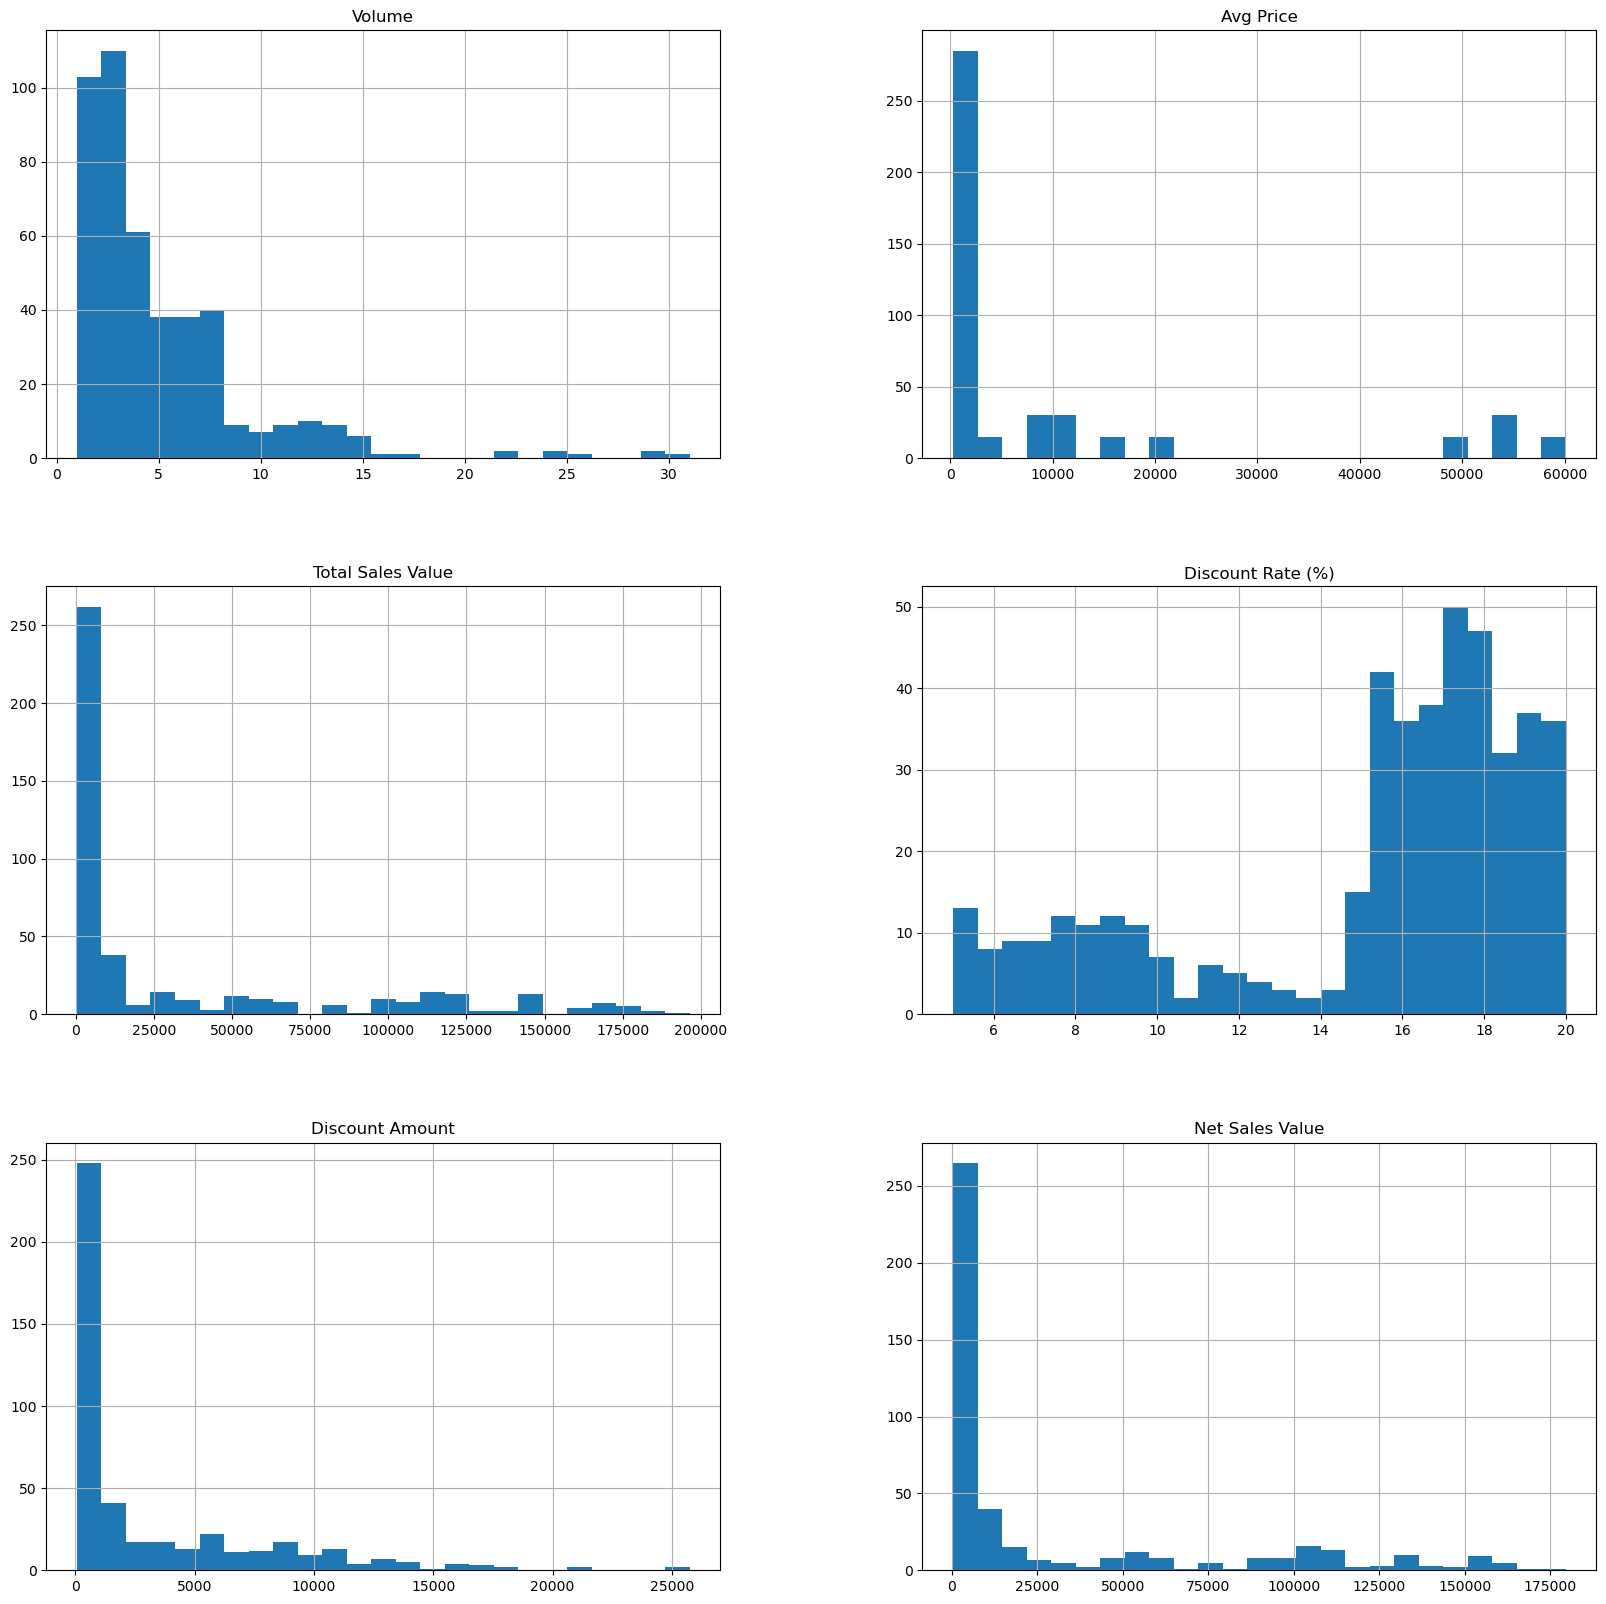

In [36]:
df.hist(bins=25,figsize=(20,20))
plt.show()

## Boxplot

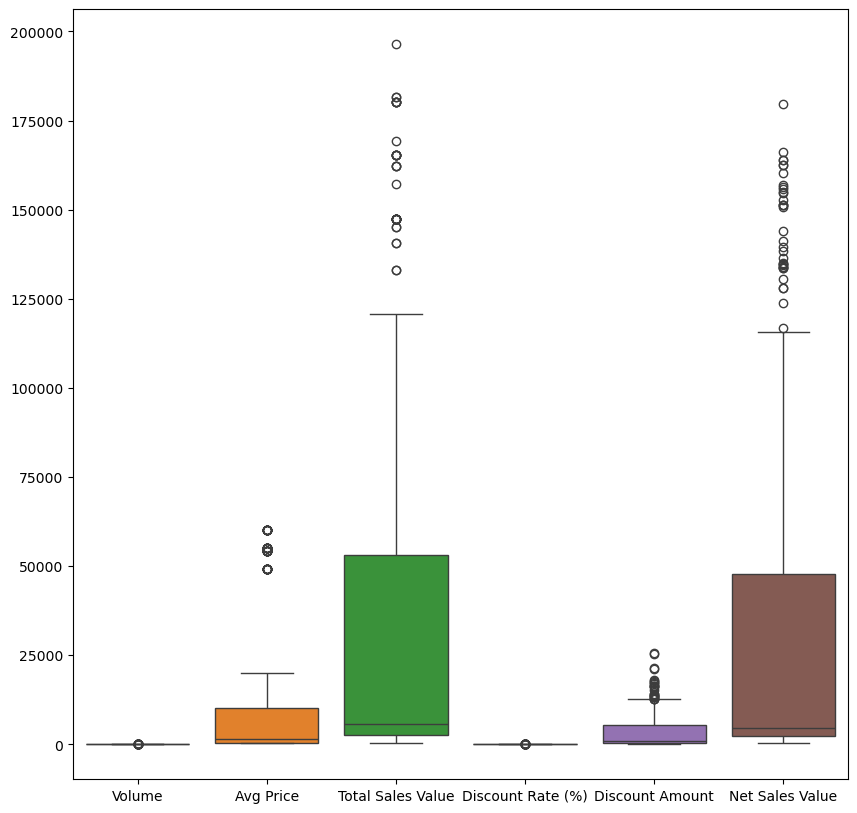

In [39]:
plt.figure(figsize=(10,10))

sns.boxplot(df)
plt.show()

In [41]:
## Indentify Categorical columns in the dataset

In [43]:
categorical_cols=df.select_dtypes(include=['object','category']).columns
print(categorical_cols)


Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [45]:
Frequency=df[['Date','Day','SKU','City','BU','Brand','Model']].value_counts()
print(Frequency)


Date        Day       SKU  City  BU       Brand    Model      
01-04-2021  Thursday  F01  C     FMCG     Babaji   Babaji Oil     1
12-04-2021  Monday    F08  C     FMCG     Gear     Gear Cream     1
11-04-2021  Sunday    F08  C     FMCG     Gear     Gear Cream     1
                      F07  C     FMCG     Gear     Gear Oil       1
                      F06  C     FMCG     Vedic    Vedic Oil      1
                                                                 ..
05-04-2021  Monday    M07  C     Mobiles  Sumsang  S-20           1
                      M06  C     Mobiles  RealU    RU-9           1
                      M05  C     Mobiles  YouM     YM-98          1
                      M04  C     Mobiles  YouM     YM-99 Plus     1
15-04-2021  Thursday  M10  C     Mobiles  Orange   O-11           1
Name: count, Length: 450, dtype: int64


## Bar Chart

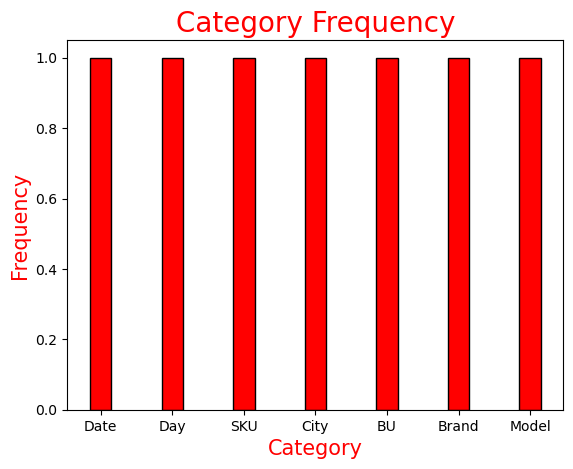

In [48]:
plt.bar(categorical_cols,color='red',edgecolor='black',width=0.3,height=1)
plt.xlabel('Category',color='red',size=15)
plt.ylabel('Frequency',color='red',size=15)
plt.title('Category Frequency',color='red',size=20);

## Standardization of Numerical variables


In [84]:
data=pd.DataFrame(df.iloc[:50,8:13])

In [86]:
data

,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,12100,181500,11.654820,21153.498820,160346.501180
1,10100,101000,11.560498,11676.102961,89323.897039
2,16100,112700,9.456886,10657.910157,102042.089843
3,20100,120600,6.935385,8364.074702,112235.925298
4,8100,24300,17.995663,4372.946230,19927.053770
5,8100,24300,16.996489,4130.146805,20169.853195
6,49100,147300,9.228812,13594.039719,133705.960281
7,54100,108200,5.553719,6009.124321,102190.875679
8,55100,110200,7.410104,8165.935144,102034.064856
9,60100,180300,9.928444,17900.983733,162399.016267


In [72]:
means=data.mean()

In [74]:
means

Avg Price            12229.140000
Total Sales Value    45296.360000
Discount Rate (%)       14.961269
Discount Amount       4466.444288
Net Sales Value      40829.915712
dtype: float64

In [76]:
stds=data.std()

In [78]:
stds

Avg Price            19491.844289
Total Sales Value    61385.011572
Discount Rate (%)        4.427215
Discount Amount       5687.620570
Net Sales Value      55996.220439
dtype: float64

In [90]:
## Standardize each column using z_Score Normalization
data_std=(data-means)/stds
print(data_std)
 

    Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0   -0.006625           2.218842          -0.746846         2.933925   
1   -0.109232           0.907447          -0.768151         1.267605   
2    0.198589           1.098047          -1.243306         1.088586   
3    0.403803           1.226743          -1.812852         0.685283   
4   -0.211839          -0.342044           0.685396        -0.016439   
5   -0.211839          -0.342044           0.459707        -0.059128   
6    1.891604           1.661703          -1.294822         1.604818   
7    2.148122           1.024739          -2.124936         0.271235   
8    2.199426           1.057321          -1.705624         0.650446   
9    2.455943           2.199293          -1.136793         2.362067   
10  -0.606876          -0.653195           0.882716        -0.612777   
11  -0.612007          -0.718357           0.365251        -0.750315   
12  -0.607389          -0.712492           0.722382        -0.73

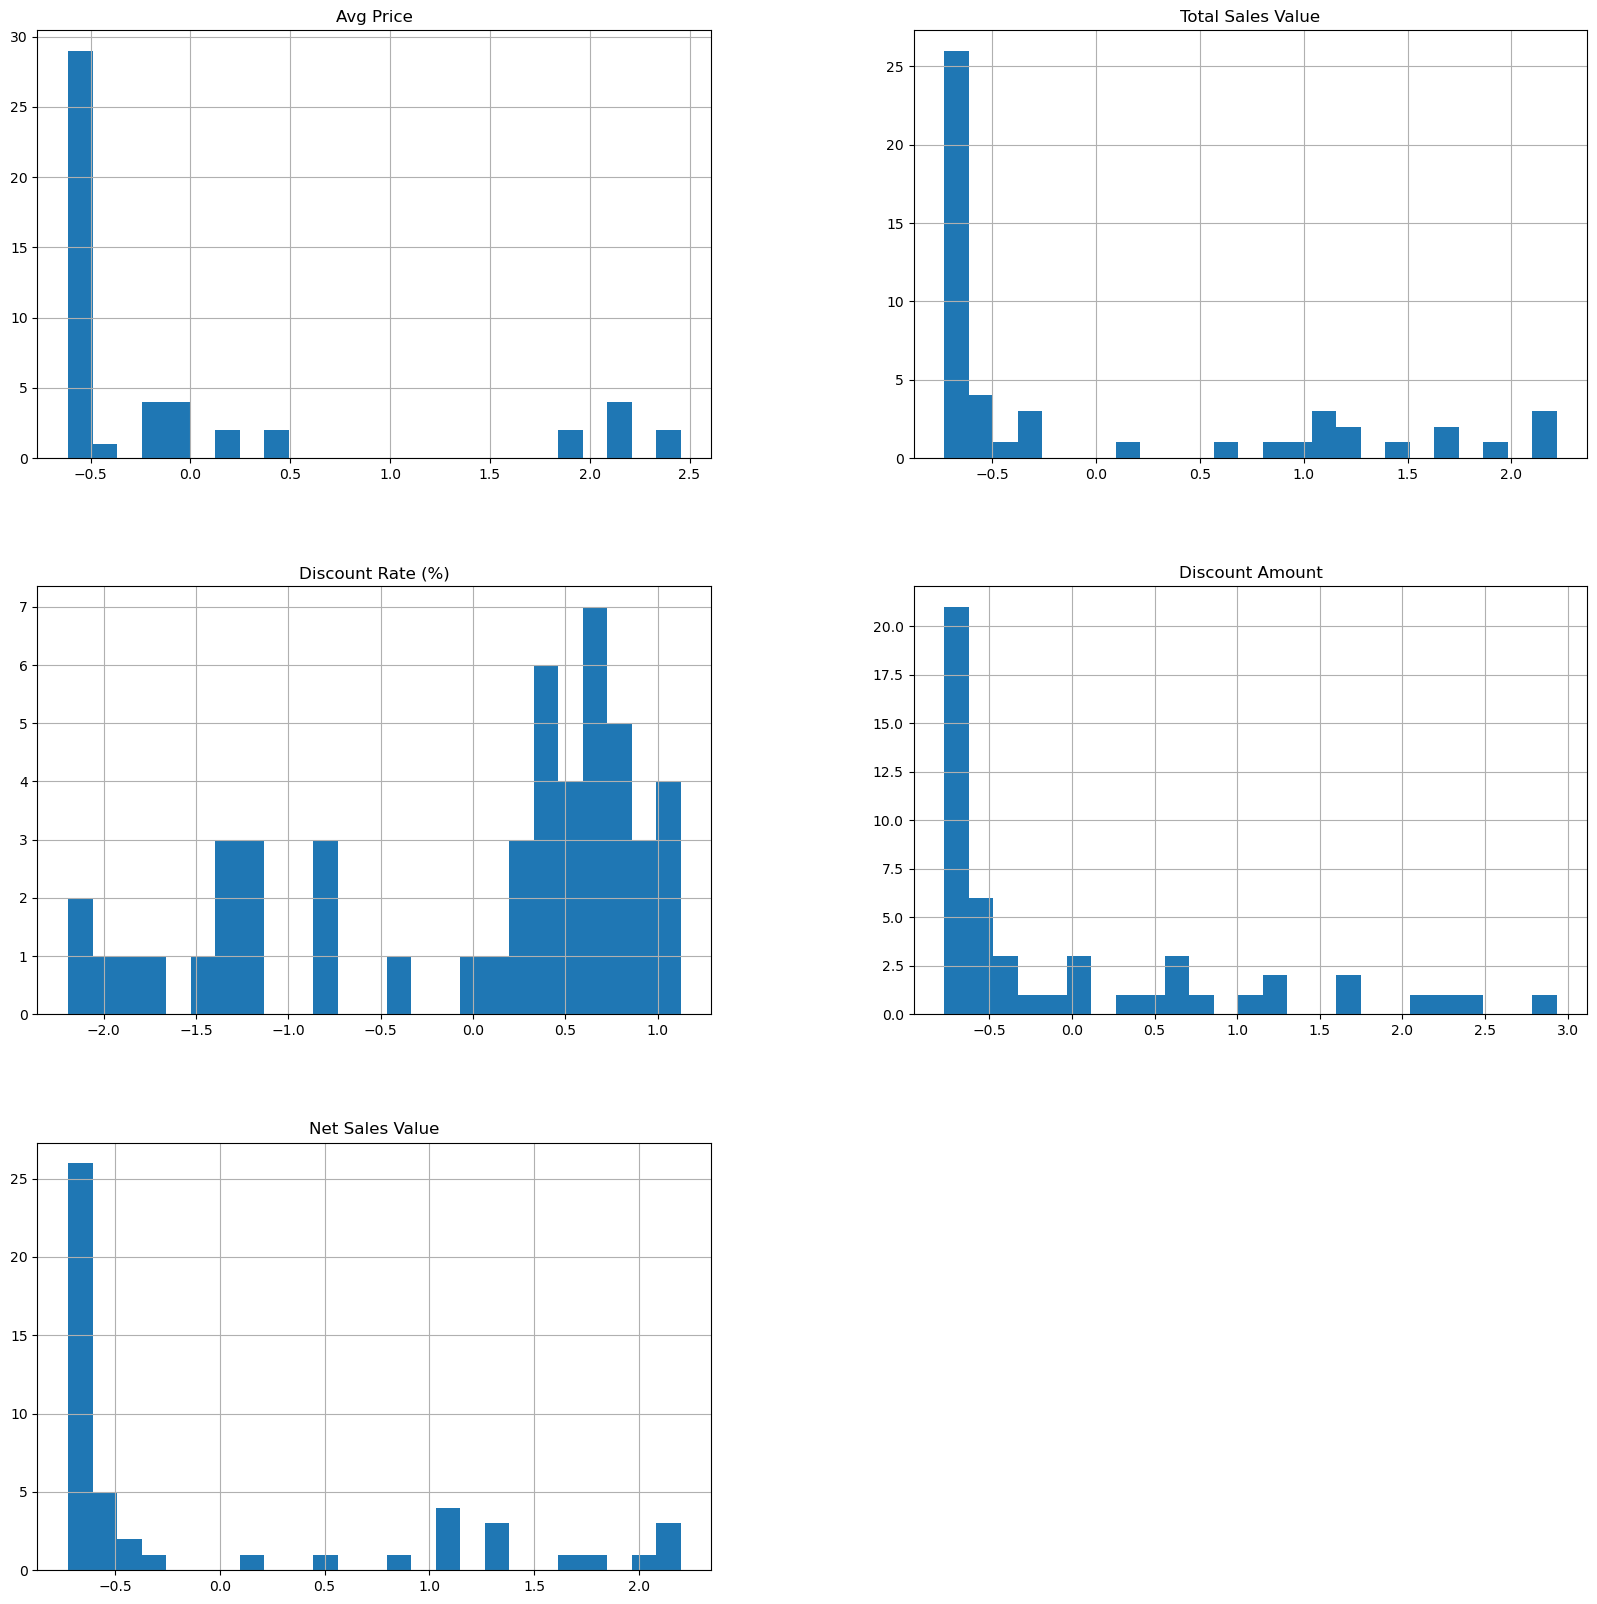

In [94]:
data_std.hist(bins=25,figsize=(20,20))
plt.show()

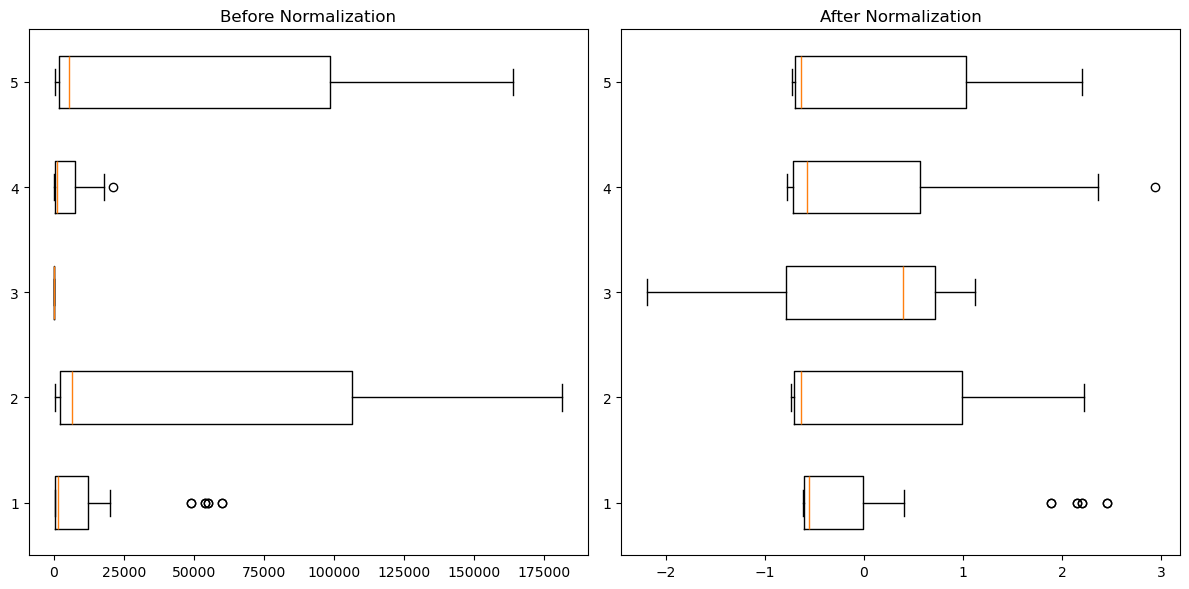

In [114]:
## Box plots
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(data,vert=False)
plt.title('Before Normalization')
plt.subplot(1,2,2)
plt.boxplot(data_std,vert=False)
plt.title('After Normalization')
plt.tight_layout()
plt.show()

## Conversion of Categorical Data into Dummy Variables

In [131]:
## One Hot Coading
df_one_hot=pd.get_dummies(df,columns=['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'])

In [133]:
print(df_one_hot)

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  Date_